## Chocolate sales performance from Difference Region of operations 

### Objective:
- This project analyzes the sales performance of various chocolate products across multiple geographies and sales representatives. The objective is to uncover insights into profitability, sales trends, and areas needing strategic improvement.


### Business Problem:
1. What is Most Profitable Products
2. Who are Best and Worst Performing Sales Representatives
3. Find the product Profit by Geography
4. What is the impact of Cost per Unit on Profit
5. What is relationship between Units Sold and Profit



Solution:
- A. Import required Library
- B. Data Collection
- C. Data Reprocessing
- D. Exploratory Data Analysis (EDA), Visualization/Intrepretaion



### A. Import the Required Library dependency.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### B. Data Collection

In [41]:
## Let import our dataset

df = pd.read_csv('chocolate .csv')

In [42]:
## Let see the first row of the dataset
df.head()

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14,"1,652",($28),-2%
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9,"3,970","$2,736",41%
2,Husein Augar,USA,Almond Choco,$959,147,12,"1,746",($787),-82%
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6,"1,863","$7,769",81%
4,Curtice Advani,UK,White Choc,"$2,100",414,13,"5,444","($3,344)",-159%


In [43]:
## Let see the last bottom of the dataset

df.tail()

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
295,Gunar Cockshoot,New Zealand,Almond Choco,$938,366,12,"4,348","($3,410)",-364%
296,Gunar Cockshoot,Australia,Baker's Choco Chips,"$8,841",303,6,"1,697","$7,144",81%
297,Barr Faughny,UK,Peanut Butter Cubes,"$4,018",126,12,"1,559","$2,459",61%
298,Carla Molina,New Zealand,Raspberry Choco,$714,231,12,"2,710","($1,996)",-280%
299,Husein Augar,Australia,White Choc,"$3,850",102,13,"1,341","$2,509",65%


### C. Data Preprocessing

In [44]:
## Let see the column headed of the dataset
df.columns

Index(['Sales Person', 'Geography', 'Product', 'Amount', 'Units',
       'cost per unit', 'Cost', 'Profit', 'profit %'],
      dtype='object')

In [45]:
## Let see the shape our dataset
df.shape

(300, 9)

In [46]:

## Let print out the attribut of our dataset

print('Number of row',df.shape[0])
print('Number of columns',df.shape[1])

Number of row 300
Number of columns 9


In [47]:
## Let drop the columns we did not need

df.drop(columns=['profit %'], inplace=True)

In [48]:
# Let see the top row of the dataset

df.head()

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14,"1,652",($28)
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9,"3,970","$2,736"
2,Husein Augar,USA,Almond Choco,$959,147,12,"1,746",($787)
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6,"1,863","$7,769"
4,Curtice Advani,UK,White Choc,"$2,100",414,13,"5,444","($3,344)"


In [49]:
## Let remove the dollar sign, commas and parenthesis

df['Profit'] = (
    df['Profit']
    .astype(str)
    .str.replace('[\$,]', '', regex=True)      # remove $ and commas
    .str.replace('[()]', '', regex=True)       # remove parentheses
    .astype(float)
)

In [50]:
df.head()

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14,"1,652",28.0
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9,"3,970",2736.0
2,Husein Augar,USA,Almond Choco,$959,147,12,"1,746",787.0
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6,"1,863",7769.0
4,Curtice Advani,UK,White Choc,"$2,100",414,13,"5,444",3344.0


In [51]:
# Let confirm if the dataset  has null value 

df.isnull().sum().sum

<bound method Series.sum of Sales Person     0
Geography        0
Product          0
Amount           0
Units            0
cost per unit    0
Cost             0
Profit           0
dtype: int64>

In [53]:
## Let see if we have duplicates in the dataset

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Length: 300, dtype: bool

In [54]:
## And let see our dataset aggregate infor e.g Total numbers of row,columns, datatype of each columns and memory size

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   300 non-null    object 
 1   Geography      300 non-null    object 
 2   Product        300 non-null    object 
 3   Amount         300 non-null    object 
 4   Units          300 non-null    int64  
 5   cost per unit  300 non-null    int64  
 6   Cost           300 non-null    object 
 7   Profit         300 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 18.9+ KB


In [55]:
## Let see the statistics of the dataset

df.describe()

,Units,cost per unit,Profit
count,300.000000,300.000000,300.000000
mean,152.200000,9.473333,3257.050000
std,118.099499,3.457717,2829.080343
min,0.000000,3.000000,5.000000
25%,54.000000,6.000000,982.750000
50%,124.500000,9.000000,2438.000000
75%,220.500000,12.000000,4861.500000
max,525.000000,17.000000,15841.000000


In [56]:
# Let see the again our first five row of our dataset
df.head()

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14,"1,652",28.0
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9,"3,970",2736.0
2,Husein Augar,USA,Almond Choco,$959,147,12,"1,746",787.0
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6,"1,863",7769.0
4,Curtice Advani,UK,White Choc,"$2,100",414,13,"5,444",3344.0


### D. Exploratory data Analysis and visualization

### 1. What is Most Profitable Products

In [57]:
most_profitable_products = (
    df.groupby("Product")["Profit"]
    .sum()
    .sort_values(ascending=False)
)
print(most_profitable_products)

Product
Baker's Choco Chips     61950.0
Eclairs                 56474.0
Peanut Butter Cubes     55984.0
Raspberry Choco         55116.0
Organic Choco Syrup     54268.0
Choco Coated Almonds    53008.0
Mint Chip Choco         52256.0
After Nines             50806.0
Caramel Stuffed Bars    47625.0
70% Dark Bites          47557.0
White Choc              47453.0
Fruit & Nut Bars        44883.0
Drinking Coco           43267.0
Milk Bars               41112.0
Manuka Honey Choco      40374.0
Orange Choco            37483.0
Almond Choco            35200.0
Spicy Special Slims     34502.0
99% Dark & Pure         31349.0
85% Dark Bars           30189.0
Smooth Sliky Salty      29710.0
50% Dark Bites          26549.0
Name: Profit, dtype: float64


### Using Bar Chart for Visualization

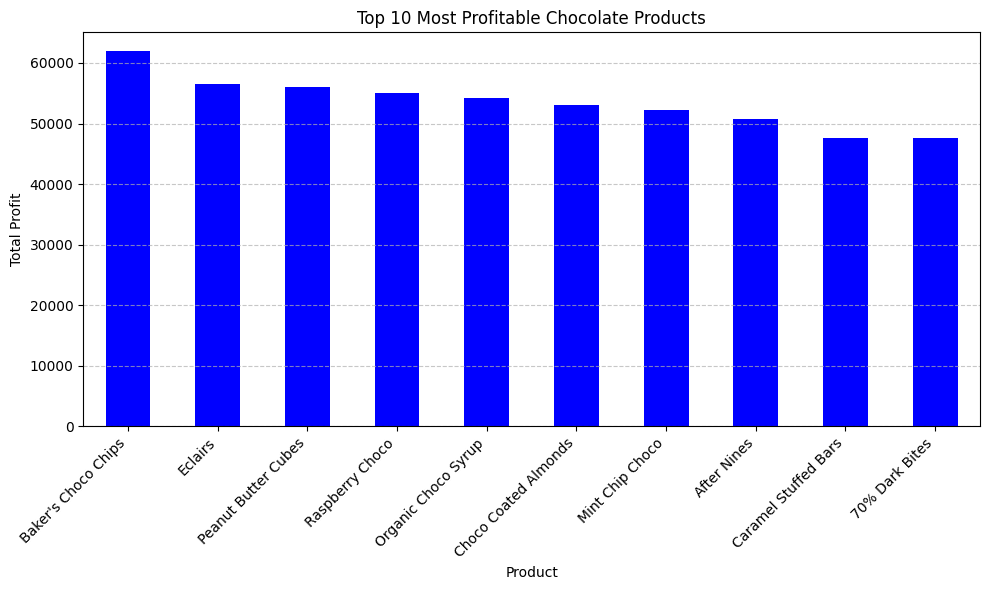

In [58]:
## Using Bar Chart

# Group and sort profitable products
most_profitable_products = (
    df.groupby("Product")["Profit"]
    .sum()
    .sort_values(ascending=False)
)

# Plot top 10 most profitable products
most_profitable_products.head(10).plot(
    kind='bar',
    figsize=(10, 6),
    color='blue',
    title='Top 10 Most Profitable Chocolate Products'
)

plt.ylabel("Total Profit")
plt.xlabel("Product")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- This chart show the top 10 chocolate products based on total profit, with the highest on top.

- This chart clearly show which products are generating losses, sorted from the biggest loss to the smallest.

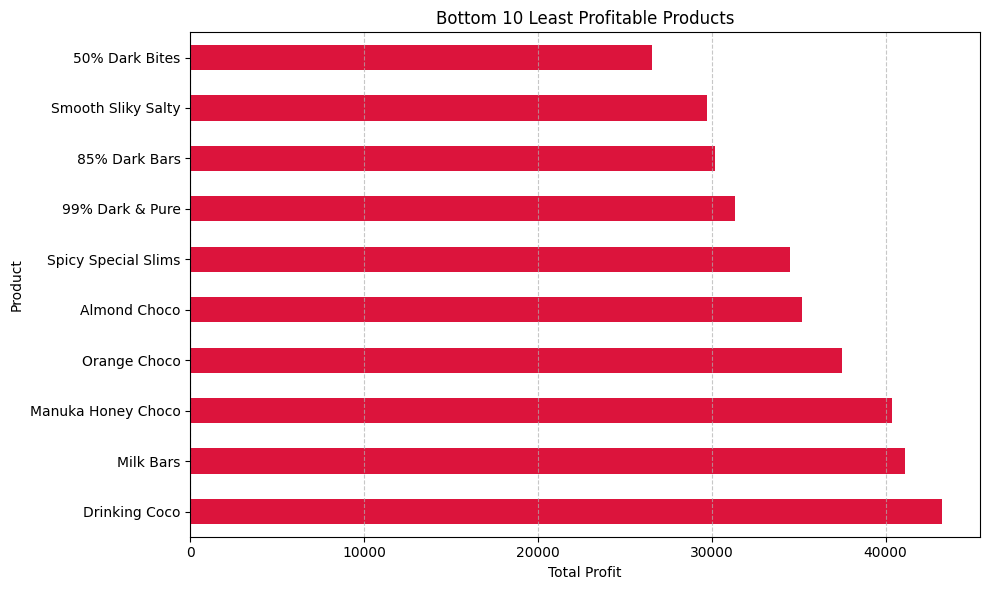

In [59]:
# Group by product and sum the profit, then sort ascending to get the least profitable
least_profitable_products = (
    df.groupby("Product")["Profit"]
    .sum()
    .sort_values(ascending=True)
)

# Select bottom 10 products
least_profitable_products.head(10).plot(
    kind='barh',
    figsize=(10, 6),
    color='crimson',
    title='Bottom 10 Least Profitable Products'
)

plt.xlabel("Total Profit")
plt.ylabel("Product")
plt.gca().invert_yaxis()  # Put the biggest loss on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2. Who are the Best and Worst Performing Sales Representatives


In [18]:
profit_by_salesperson = (
    df.groupby("Sales Person")["Profit"]
    .sum()
    .sort_values(ascending=False)
)
print(profit_by_salesperson)

Sales Person
Gigi Bohling       140185.0
Ram Mahesh         115790.0
Barr Faughny       110803.0
Ches Bonnell       110105.0
Curtice Advani     107259.0
Husein Augar       100171.0
Carla Molina        81986.0
Gunar Cockshoot     79511.0
Brien Boise         72189.0
Oby Sorrel          59116.0
Name: Profit, dtype: float64


In [ ]:
## Using Barchart

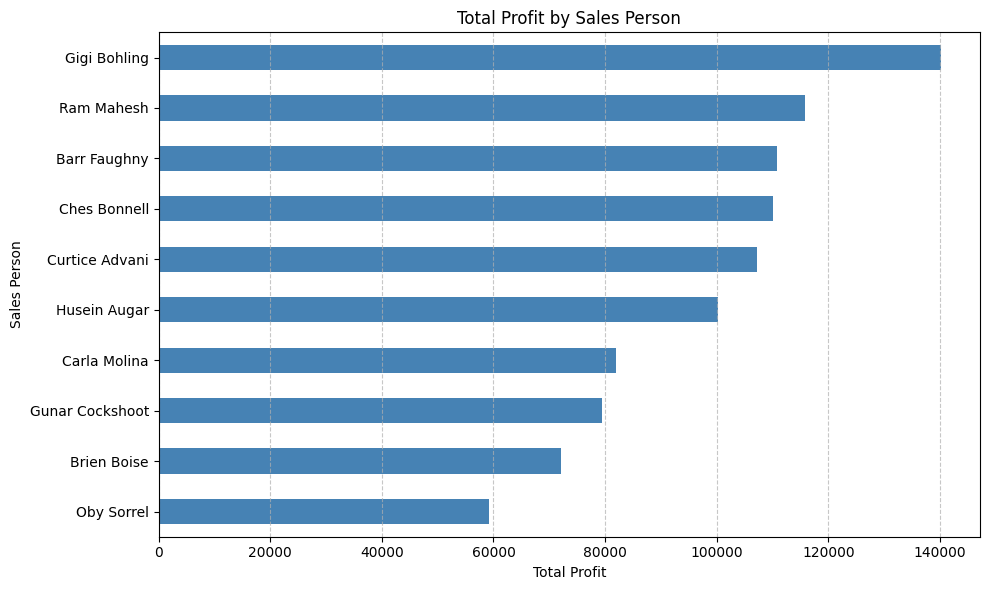

In [60]:
# Group and sort profit by sales person
profit_by_salesperson = (
    df.groupby("Sales Person")["Profit"]
    .sum()
    .sort_values(ascending=False)
)

# Plot all or top N salespeople (e.g., top 10)
profit_by_salesperson.plot(
    kind='barh',
    figsize=(10, 6),
    color='steelblue',
    title='Total Profit by Sales Person'
)

plt.xlabel("Total Profit")
plt.ylabel("Sales Person")
plt.gca().invert_yaxis()  # To show highest profit at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3. Find the product Profit by Geography

In [20]:
profit_by_geo = (
    df.groupby("Geography")["Profit"]
    .sum()
    .sort_values(ascending=False)
)
profit_by_geo.head()

Geography
Canada         199086.0
New Zealand    188063.0
India          187209.0
UK             146850.0
Australia      131168.0
Name: Profit, dtype: float64

In [ ]:
##  chart to illustration

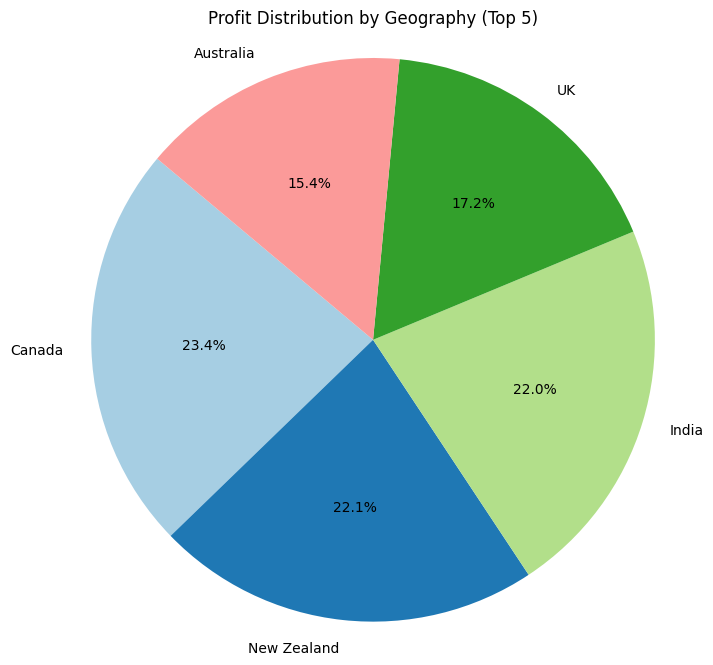

In [61]:
# Group and sort profit by geography
profit_by_geo = (
    df.groupby("Geography")["Profit"]
    .sum()
    .sort_values(ascending=False)
)

# Optional: focus on top 5 geographies
top_geo = profit_by_geo.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_geo,
    labels=top_geo.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Profit Distribution by Geography (Top 5)")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

#### And the pie chart visualizes the total profit contribution of the top 5 performing geographies (countries or regions) based on your dataset.

#### Each slice represents a country and shows:

- Its share of the total profit (as a percentage).

- The relative size compared to other top regions.

### 4. What is the impact of Cost per Unit on Profit

In [21]:
cost_vs_profit = (
    df.groupby("cost per unit")
    .agg(avg_profit=('Profit', 'mean'), num_sales=('Profit', 'count'))
    .sort_values(by="cost per unit")
)
print(cost_vs_profit)

                avg_profit  num_sales
cost per unit                        
3              3322.000000         17
5              3354.333333          9
6              3392.641509         53
7              2374.941176         17
8              2239.214286         14
9              3617.560000         50
10             3175.193548         31
11             3748.300000         10
12             3601.020833         48
13             2791.352941         17
14             2972.312500         16
17             3014.888889         18


In [22]:
cost_vs_profit.head()

,avg_profit,num_sales
cost per unit,,
3,3322.000000,17
5,3354.333333,9
6,3392.641509,53
7,2374.941176,17
8,2239.214286,14


- Option 1: Line Chart (Trend of Average Profit by Cost per Unit)

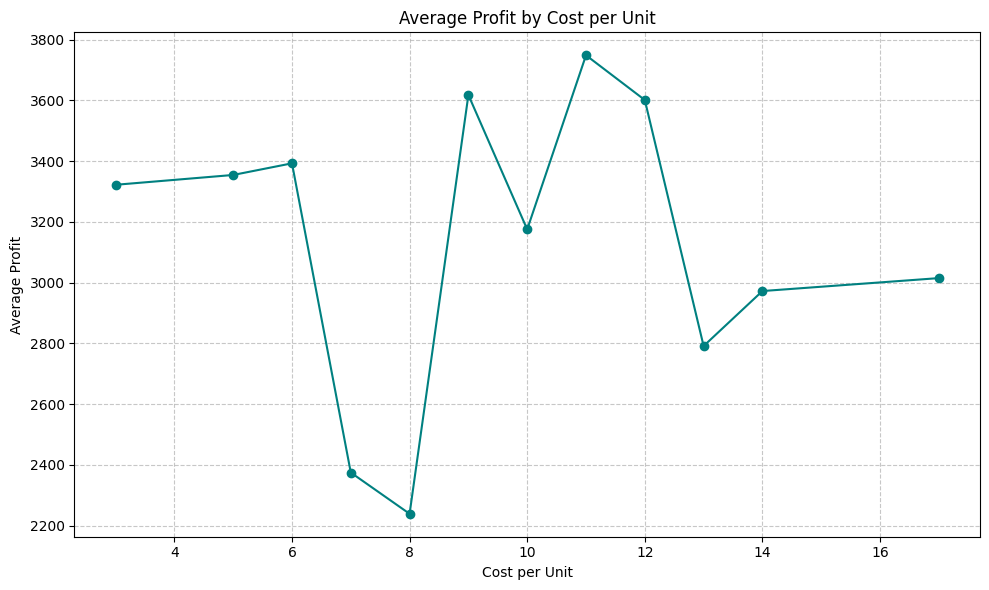

In [62]:
# Using line chart of cost per unit vs average profit


plt.figure(figsize=(10, 6))
plt.plot(
    cost_vs_profit.index,  # cost per unit
    cost_vs_profit['avg_profit'],
    marker='o',
    color='teal'
)

plt.title("Average Profit by Cost per Unit")
plt.xlabel("Cost per Unit")
plt.ylabel("Average Profit")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Option 2: Scatter Plot (Also Showing Volume of Sales)

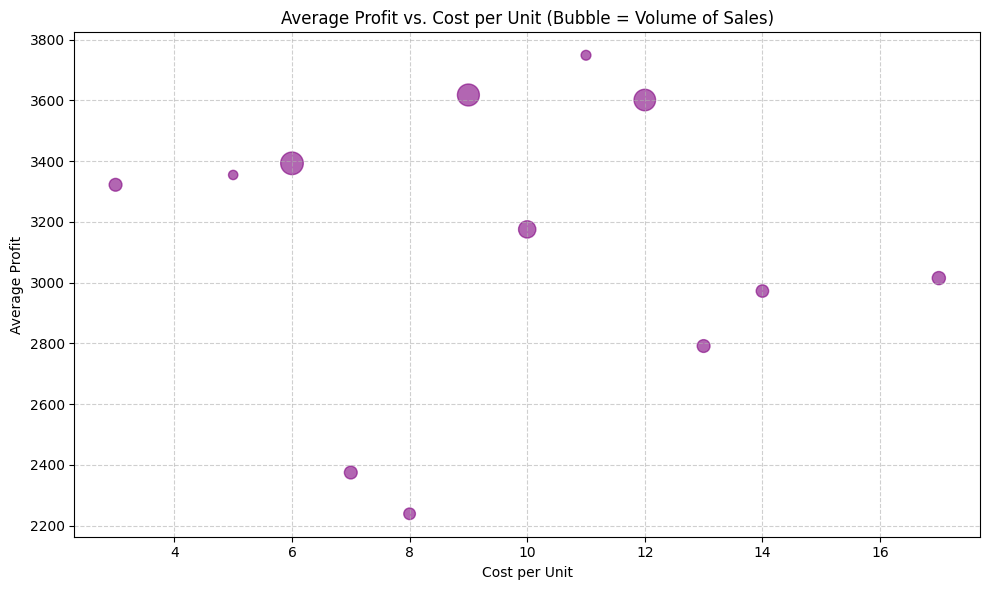

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(
    cost_vs_profit.index,                # x = cost per unit
    cost_vs_profit['avg_profit'],        # y = average profit
    s=cost_vs_profit['num_sales'] * 5,   # bubble size = number of sales
    color='purple',
    alpha=0.6
)

plt.title("Average Profit vs. Cost per Unit (Bubble = Volume of Sales)")
plt.xlabel("Cost per Unit")
plt.ylabel("Average Profit")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Interpretation of the Chart
- Higher cost per unit may or may not result in higher profit — this helps determine pricing strategy.
- Bigger bubbles in the scatter plot indicate frequently sold price points.
- Look for a trend or sweet spot where profit is high and sales volume is decent.

### 5. What is relationship between Units Sold and Profit

In [64]:
units_vs_profit = (
    df.groupby("Units")["Profit"]
    .mean()
    .reset_index(name="avg_profit")
    .sort_values(by="Units")
)
print(units_vs_profit)

     Units  avg_profit
0        0     5306.00
1        3     4616.25
2        6     3387.00
3        9     3770.00
4       12     5275.50
..     ...         ...
115    492     3238.00
116    504     3417.00
117    510     3939.00
118    519     7885.00
119    525      557.00

[120 rows x 2 columns]


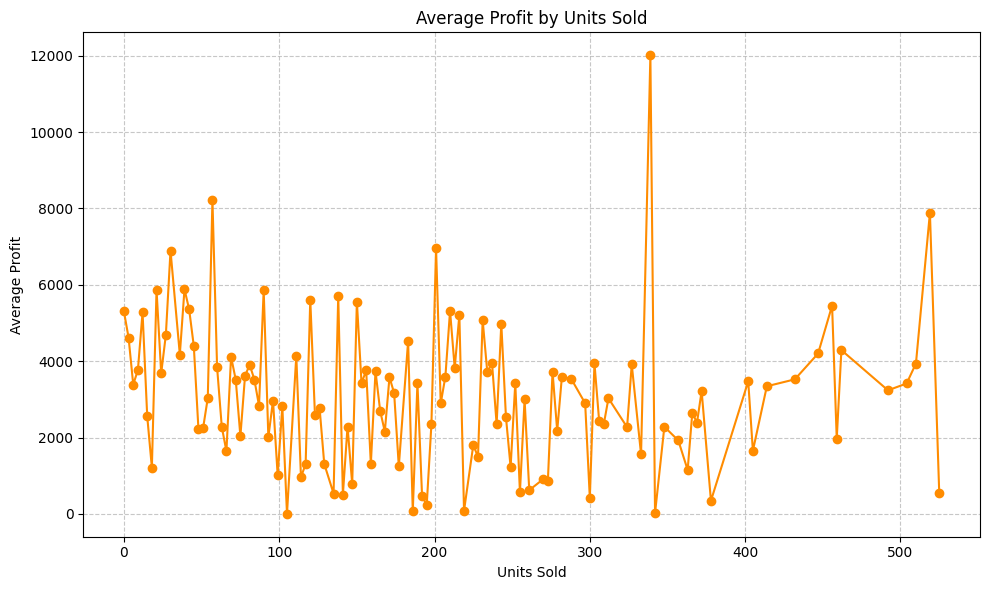

In [65]:
# Plot the relationship between units sold and average profit
plt.figure(figsize=(10, 6))
plt.plot(
    units_vs_profit['Units'],          # x-axis: Units sold
    units_vs_profit['avg_profit'],     # y-axis: Average profit
    marker='o',
    color='darkorange'
)

plt.title("Average Profit by Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Average Profit")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Interpretation
- This chart shows whether selling more units generally leads to higher or lower average profit.

#### Look for trends:

- If the line goes up: more units sold = higher average profit.

- If the line goes down: bulk selling may be cutting into margins.

In [39]:
# Export the New csv file after data exploratory is conduct in python to Sql for Query

df.to_csv('/Users/user/Desktop/Chocolate Project1/Newchocolate.csv', index=False)